## Product_Packaging based on the transactional data

In [14]:
import numpy as np
import scipy as sc
from pandas import Series,DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from collections import OrderedDict
from fractions import Fraction

get_ipython().magic(u'matplotlib inline')
mpl.rcParams['figure.figsize'] = (10.0, 5)

In [15]:
def plot_matrix(matrix):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix, interpolation='nearest')
    fig.colorbar(cax)



### Selcting  some random products from the CSV file and apply the ML algorithm on it.

In [4]:
                              
transaction_df =  pd.read_csv("add_cart.csv", skipinitialspace=True,usecols=['Pod for Entertainment','The Infinity Wardrobe - Basic',
                                                                                            'Pico Single Bed- Premium','Vitello Single Studio' ,
                                                                                             'The Reading Nook - Value','TV washing machine combo',
                            'Mili Four Seater Dining Table Package'] )
#index_col=[0,1]
transaction_df


,Pico Single Bed- Premium,Pod for Entertainment,The Infinity Wardrobe - Basic,Mili Four Seater Dining Table Package,Vitello Single Studio,TV washing machine combo,The Reading Nook - Value
0,0,0,3,0,0,2,1
1,0,0,4,0,0,2,0
2,1,0,1,0,0,4,0
3,0,1,1,0,0,1,0
4,0,1,1,0,0,1,0
5,0,1,3,0,0,2,0
6,0,1,2,0,0,2,0
7,0,2,2,0,0,2,0
8,0,1,0,0,0,0,0
9,0,1,1,0,0,1,0


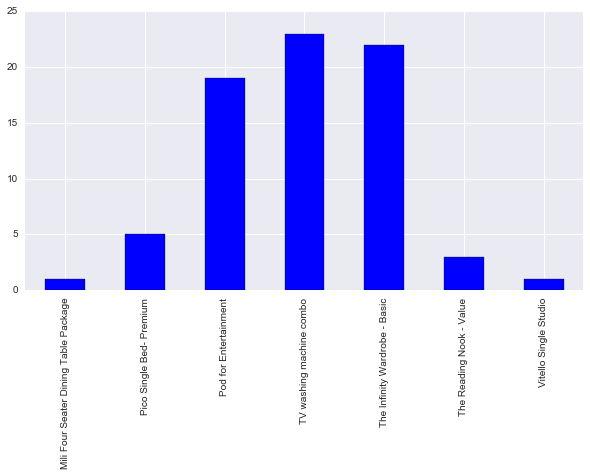

In [5]:
# calculate support for every product in all transactions
product_support_dict = {}
for column in transaction_df.columns:
    product_support_dict[column] = sum(transaction_df[column]>0)
    
# visualise support
pd.Series(product_support_dict).plot(kind="bar")



In [6]:

transaction_matrix = transaction_df.as_matrix()
transaction_matrix

array([[0, 0, 3, 0, 0, 2, 1],
       [0, 0, 4, 0, 0, 2, 0],
       [1, 0, 1, 0, 0, 4, 0],
       [0, 1, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 1, 0],
       [0, 1, 3, 0, 0, 2, 0],
       [0, 1, 2, 0, 0, 2, 0],
       [0, 2, 2, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 1, 7, 0, 0, 0, 0],
       [0, 2, 1, 0, 0, 2, 0],
       [1, 0, 2, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 4, 0],
       [0, 0, 3, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 3, 0],
       [0, 1, 1, 0, 3, 3, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 1, 0],
       [0, 2, 3, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 1, 1],
       [0, 4, 2, 0, 0, 4, 0],
       [0, 2, 1, 0, 0, 0, 0],
       [2, 2, 5, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 0]], dtype=int64)

In [16]:
#converting datsets into boolean form
bool_index = (transaction_matrix>0)
bool_index


array([[False, False,  True, False, False,  True,  True],
       [False, False,  True, False, False,  True, False],
       [ True, False,  True, False, False,  True, False],
       [False,  True,  True, False, False,  True, False],
       [False,  True,  True, False, False,  True, False],
       [False,  True,  True, False, False,  True, False],
       [False,  True,  True, False, False,  True, False],
       [False,  True,  True, False, False,  True, False],
       [False,  True, False, False, False, False, False],
       [False,  True,  True, False, False,  True, False],
       [False, False, False, False, False,  True, False],
       [False, False, False, False, False,  True, False],
       [False, False,  True, False, False, False,  True],
       [False, False,  True, False, False, False, False],
       [ True,  True,  True, False, False, False, False],
       [False,  True,  True, False, False,  True, False],
       [ True, False,  True, False, False,  True, False],
       [False,

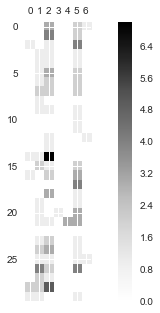

In [8]:

plot_matrix(transaction_matrix)


In [9]:
# get number of rows and columns
rows, columns = transaction_matrix.shape
# init new matrix
frequent_items_matrix = np.zeros((5,5))
# compare every product with every other
for this_column in range(0, columns-1):
    print ("this:", this_column,":",transaction_df.columns[this_column])
    for next_column in range(this_column + 1, columns):
        print ("\tnext:", next_column,":",transaction_df.columns[next_column])
        # multiply product pair vectors
        product_vector = transaction_matrix[:,this_column] * transaction_matrix[:,next_column]
        # check the number of pair occurrences in baskets
        count_matches = sum((product_vector)>0)
        print ("\t", count_matches)
        # save values to new matrix



this: 0 : Pico Single Bed- Premium
	next: 1 : Pod for Entertainment
	 3
	next: 2 : The Infinity Wardrobe - Basic
	 4
	next: 3 : Mili Four Seater Dining Table Package
	 0
	next: 4 : Vitello Single Studio
	 0
	next: 5 : TV washing machine combo
	 3
	next: 6 : The Reading Nook - Value
	 0
this: 1 : Pod for Entertainment
	next: 2 : The Infinity Wardrobe - Basic
	 15
	next: 3 : Mili Four Seater Dining Table Package
	 1
	next: 4 : Vitello Single Studio
	 1
	next: 5 : TV washing machine combo
	 15
	next: 6 : The Reading Nook - Value
	 1
this: 2 : The Infinity Wardrobe - Basic
	next: 3 : Mili Four Seater Dining Table Package
	 0
	next: 4 : Vitello Single Studio
	 1
	next: 5 : TV washing machine combo
	 17
	next: 6 : The Reading Nook - Value
	 3
this: 3 : Mili Four Seater Dining Table Package
	next: 4 : Vitello Single Studio
	 0
	next: 5 : TV washing machine combo
	 1
	next: 6 : The Reading Nook - Value
	 0
this: 4 : Vitello Single Studio
	next: 5 : TV washing machine combo
	 1
	next: 6 : The R

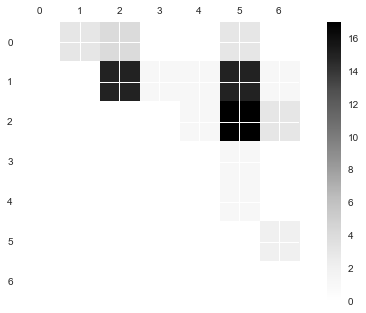

In [10]:
# take data matrix from dataframe
transaction_matrix = transaction_df.as_matrix()
# get number of rows and columns
rows, columns = transaction_matrix.shape
# init new matrix
frequent_items_matrix = np.zeros((7,7))
# compare every product with every other
for this_column in range(0, columns-1):
    for next_column in range(this_column + 1, columns):
        # multiply product pair vectors
        product_vector = transaction_matrix[:,this_column] * transaction_matrix[:,next_column]
        # check the number of pair occurrences in baskets
        count_matches = sum((product_vector)>0)
        # save values to new matrix
        frequent_items_matrix[this_column,next_column] = count_matches
 

plot_matrix(frequent_items_matrix)

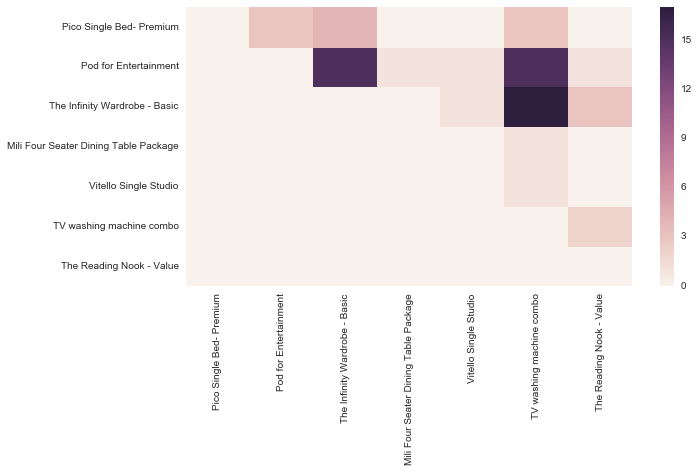

In [11]:
#print (frequent_items_matrix) 
# combine matrix with names
frequent_items_df = pd.DataFrame(frequent_items_matrix, columns = transaction_df.columns.values, index = transaction_df.columns.values)
sns.heatmap(frequent_items_df)


In [12]:
product_names = transaction_df.columns.values


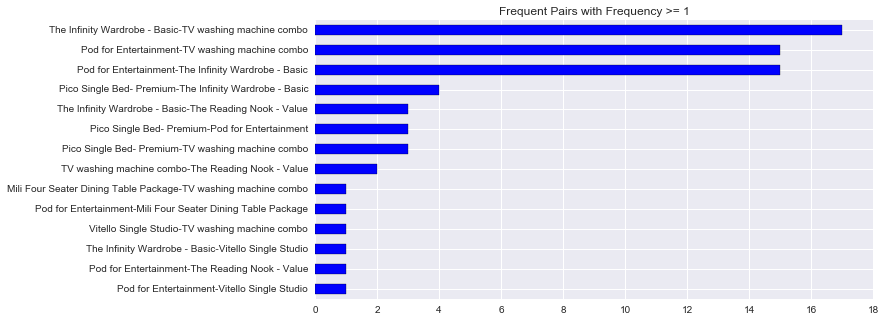

In [13]:
# extract product pairs with minimum frequency(treshold) basket occurrences
def extract_pairs(treshold):
    output = {}
    # select indexes with larger or equal n
    matrix_coord_list = np.where(frequent_items_matrix >= treshold)
    # take values
    row_coords = matrix_coord_list[0]
    column_coords = matrix_coord_list[1]
    # generate pairs
    for index, value in enumerate(row_coords):
        #print index
        row = row_coords[index]
        column = column_coords[index]
        # get product names
        first_product = product_names[row]
        second_product = product_names[column]
        # number of basket matches
        matches = frequent_items_matrix[row,column]
        # put key values into dict
        output[first_product+"-"+second_product] = matches
    
    # return sorted dict
    sorted_output = OrderedDict(sorted(output.items(), key=lambda x: x[1]))
    return sorted_output
    
# plot pairs with minimum frequency of 2 basket matches
min_frequency = 1
ax = pd.Series(extract_pairs(min_frequency)).plot(kind="barh", title="Frequent Pairs with Frequency >= " + str(min_frequency))
